In [ ]:
#  I chose response_binary as my target .
# It is a binary classification problem as it has only 2 classes.
# Due to imbalanced classes I chose precision & recall as my eveluation metric
#  I will random split my data for train ,test split

In [72]:
#  imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [73]:
# Read dataset
import pandas as pd
bank = pd.read_csv('../../../Downloads/bank_cleaned.csv')

In [74]:
# see the columns of bank dataframe
bank.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response', 'response_binary'],
      dtype='object')

In [75]:
#  dropping columns
bank =bank.drop(columns=['default',
       'balance', 'housing', 'loan', 'day', 'month',
       'pdays', 'previous','Unnamed: 0'], axis=1 )

In [76]:
# first 5 rows of the dataframe
# shape of the dataframe
print(bank.shape)
bank.head()

(40841, 9)


,age,job,marital,education,duration,campaign,poutcome,response,response_binary
0,58,management,married,tertiary,4.35,1,unknown,no,0
1,44,technician,single,secondary,2.52,1,unknown,no,0
2,33,entrepreneur,married,secondary,1.27,1,unknown,no,0
3,35,management,married,tertiary,2.32,1,unknown,no,0
4,28,management,single,tertiary,3.62,1,unknown,no,0


In [77]:
# see the different values of response feature 
bank['response'].value_counts()

no     36202
yes     4639
Name: response, dtype: int64

In [78]:
# see the different values of response_binary feature
bank['response_binary'].value_counts()


0    36202
1     4639
Name: response_binary, dtype: int64

In [79]:
# check for null values
bank.isnull().sum()

age                0
job                0
marital            0
education          0
duration           0
campaign           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [80]:
# dropping response feature as well. because response & response_binary are duplicate columns
bank = bank.drop(['response'],axis =1 )

In [81]:
# unique values of response_binary
y = bank['response_binary']
y.nunique()


2

In [82]:
# different values of y --- majority class 88% so there is imbalanced classes
y.value_counts(normalize=True)

0    0.886413
1    0.113587
Name: response_binary, dtype: float64

In [83]:
# dropping target from input data
X = bank.drop('response_binary',axis=1)

In [84]:
X

,age,job,marital,education,duration,campaign,poutcome
0,58,management,married,tertiary,4.35,1,unknown
1,44,technician,single,secondary,2.52,1,unknown
2,33,entrepreneur,married,secondary,1.27,1,unknown
3,35,management,married,tertiary,2.32,1,unknown
4,28,management,single,tertiary,3.62,1,unknown
...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,6.43,2,unknown
40837,51,technician,married,tertiary,16.28,3,unknown
40838,71,retired,divorced,primary,7.60,2,unknown
40839,72,retired,married,secondary,18.78,5,success


In [85]:
X.shape

(40841, 7)

In [97]:
bank['poutcome'].value_counts()

unknown    34802
failure     4648
success     1391
Name: poutcome, dtype: int64

In [16]:
# I have imbalanced classes so accuracy is not the right metric.
# Preicion is worth calculating --as if I predict existing customer will say yes 
# for the term deposit which is my y variable & actually they do sign up for the term deposit then it is good for business.
#  for my case study I want my precision to be high.

In [86]:
X

,age,job,marital,education,duration,campaign,poutcome
0,58,management,married,tertiary,4.35,1,unknown
1,44,technician,single,secondary,2.52,1,unknown
2,33,entrepreneur,married,secondary,1.27,1,unknown
3,35,management,married,tertiary,2.32,1,unknown
4,28,management,single,tertiary,3.62,1,unknown
...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,6.43,2,unknown
40837,51,technician,married,tertiary,16.28,3,unknown
40838,71,retired,divorced,primary,7.60,2,unknown
40839,72,retired,married,secondary,18.78,5,success


In [87]:
# splitting the data into train & test dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#  checking the shape of train,test & val dataset

X_train.shape, X_val.shape,X_test.shape
    

((26137, 7), (6535, 7), (8169, 7))

In [88]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [20]:
#  Baseline model using DummyClassifier

# Precision the accuracy of minority class predictions.
# as Precision, therefore, calculates the accuracy for the minority class.
# Precision evaluates the fraction of correct classified instances among the ones classified as positive
# precision score for the validation dataset

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score




# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier
baseline = DummyClassifier(strategy='uniform')
baseline.fit(X_train, y_train)

# Make predictions on validation data
y_pred = baseline.predict(X_val)
print(precision_score(y_val, y_pred,average='binary'))
print(recall_score(y_val, y_pred,average='binary'))





0.10828999694096055
0.48559670781893005


In [21]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [22]:
# precision score & recall for the test dataset

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

# from sklearn.metrics import f1_score

# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier on training data
baseline = DummyClassifier(strategy='uniform')
baseline.fit(X_train, y_train)

# Make predictions on test data
y_pred1 = baseline.predict(X_test)
print(precision_score(y_test, y_pred1,average='binary'))
print(recall_score(y_test, y_pred1,average='binary'))
# print(f1_score(y_val, y_pred, average='binary'))



0.11382510991695163
0.4983957219251337


In [23]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [24]:
# Linear model--- Logistic regression -- beats baseline model


import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1,class_weight='balanced')
)

# Fit on the training set
pipeline.fit(X_train, y_train)

# Score on validation set


# Make predictions on validation data
y_pred5 = pipeline.predict(X_val)
print(precision_score(y_val, y_pred5,average='binary'))
print(recall_score(y_val, y_pred5,average='binary'))




0.3621285418106427
0.7187928669410151


In [25]:
import matplotlib
print(matplotlib.__version__)

3.2.0


In [26]:
#  for showing  confusion matrix properly.(important)

!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /Users/anitasharma/opt/anaconda3/lib/python3.7/site-packages (3.2.0)


In [27]:
matplotlib.__version__

'3.2.0'

In [28]:
X_train.shape,X_val.shape

((26137, 7), (6535, 7))

In [29]:
# prescision score in random forest using One Hot encoder
# Random forest beats baseline model

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
 
    RandomForestClassifier(n_jobs=-1, random_state=42,class_weight='balanced')
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)

# Make predictions on validation data
y_pred2 = pipeline.predict(X_val)
print(precision_score(y_val, y_pred2,average='binary'))
print(recall_score(y_val, y_pred2,average='binary'))

/Users/anitasharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5793103448275863
0.345679012345679


In [30]:
X_train.shape

(26137, 7)

In [31]:
# Classification report for Random Forest Classifier using one hot encoder

from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5806
           1       0.58      0.35      0.43       729

    accuracy                           0.90      6535
   macro avg       0.75      0.66      0.69      6535
weighted avg       0.88      0.90      0.89      6535



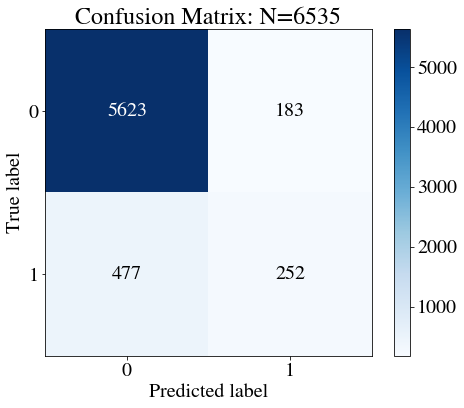

In [101]:
#  confusion matrix

from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_val, y_pred2,
                      figsize=(8,6),
                      title=f'Confusion Matrix: N={len(y_val)}',
                      normalize=False);   

In [34]:
list(X_val.iloc[3].values)

[31, 'technician', 'single', 'tertiary', 22.4, 7, 'unknown']

In [35]:
from joblib import dump
dump(pipeline, 'random_forest.joblib', compress=True)

['random_forest.joblib']

In [36]:
X_train.shape,X_val.shape,X_test.shape

((26137, 7), (6535, 7), (8169, 7))

In [37]:
print('X_train shape before encoding', X_train.shape)
encoder = pipeline.named_steps['onehotencoder']
encoded_df = encoder.transform(X_train)
print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (26137, 7)
X_train shape after encoding (26137, 24)


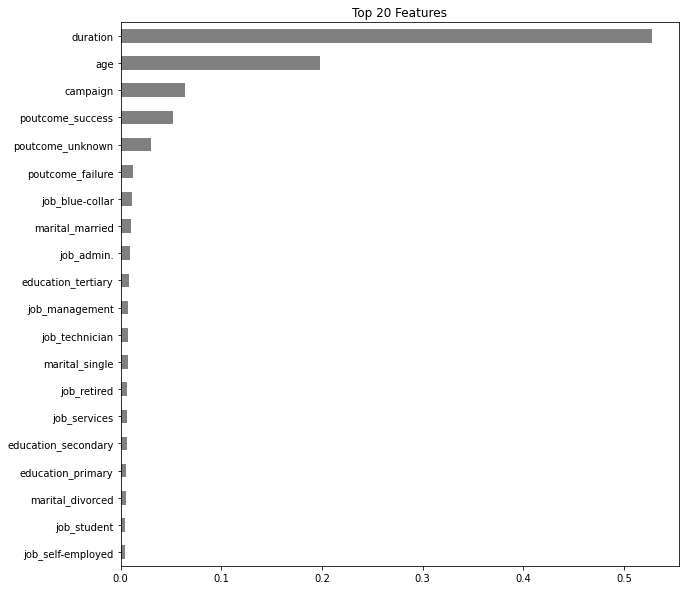

In [38]:
# feature importances through Random Forest classifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [39]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [40]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Note: Decision trees do not need StandardScaler()
# Since we are splitting the data one feature at a time the scale does not matter
# i.e. If the actual range was 0 to 100 and the optimal split was 70
# If you scale from 0 to 1, the optimal split will still be 0.7



pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='median'),
    DecisionTreeClassifier(min_samples_leaf=10,random_state=42,class_weight='balanced')
)

# Fit on the training set
pipeline.fit(X_train, y_train)

# precision Score on validation set

# print('Precision score for Decision tree classifier ',precision_score(y_val, y_pred,average='binary'))


# Make predictions on validation data
y_pred3 = pipeline.predict(X_val)
print(precision_score(y_val, y_pred3,average='binary'))
print(recall_score(y_val, y_pred3,average='binary'))


0.3010262257696693
0.7242798353909465


In [41]:
!pip install eli5

In [42]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [43]:
# more imports

import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


In [49]:

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val) 

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced')
model.fit(X_train_transformed, y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [50]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [51]:
X_val

,age,job,marital,education,duration,campaign,poutcome
32446,33,technician,divorced,secondary,4.62,1,unknown
16193,42,blue-collar,married,primary,6.43,4,unknown
10855,26,technician,single,secondary,4.95,1,unknown
19443,31,technician,single,tertiary,22.40,7,unknown
36915,48,admin.,divorced,secondary,4.13,1,failure
...,...,...,...,...,...,...,...
21402,59,blue-collar,married,primary,1.70,5,unknown
17305,39,services,married,secondary,7.05,2,unknown
32470,40,blue-collar,single,secondary,3.35,1,unknown
27740,28,blue-collar,married,secondary,1.10,1,unknown


In [52]:
# permutation importance

import eli5
from eli5.sklearn import PermutationImportance

#1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                               

In [53]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

duration     0.035807
poutcome     0.020964
age          0.002663
marital      0.002632
campaign     0.002540
education   -0.001071
job         -0.001928
dtype: float64

In [54]:
# 2. Display permutation importances (the nice way)
eli5.show_weights(
    permuter,
    top=None, #Shows all features
    feature_names=feature_names
)

Weight,Feature
0.0358 ± 0.0040,duration
0.0210 ± 0.0016,poutcome
0.0027 ± 0.0024,age
0.0026 ± 0.0036,marital
0.0025 ± 0.0014,campaign
-0.0011 ± 0.0032,education
-0.0019 ± 0.0040,job


In [55]:
X_train

,age,job,marital,education,duration,campaign,poutcome
16533,44,technician,married,tertiary,2.63,2,unknown
38996,62,retired,married,secondary,1.57,5,success
26331,38,management,single,tertiary,5.25,1,unknown
11548,57,housemaid,married,primary,3.23,1,unknown
33282,55,services,married,secondary,0.47,1,unknown
...,...,...,...,...,...,...,...
5582,40,blue-collar,married,primary,7.83,2,unknown
27412,52,services,married,secondary,2.25,2,unknown
30812,33,technician,single,secondary,1.73,3,failure
32546,25,services,single,secondary,4.70,1,unknown


In [56]:
minimum_importance = 0 

mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask] # Subsetting with just the important features
X_train = X_train[features]

In [57]:
X_train

,age,marital,duration,campaign,poutcome
16533,44,married,2.63,2,unknown
38996,62,married,1.57,5,success
26331,38,single,5.25,1,unknown
11548,57,married,3.23,1,unknown
33282,55,married,0.47,1,unknown
...,...,...,...,...,...
5582,40,married,7.83,2,unknown
27412,52,married,2.25,2,unknown
30812,33,single,1.73,3,failure
32546,25,single,4.70,1,unknown


In [58]:
# Random Forest Model using Ordinal encoder

X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced')
)
pipeline.fit(X_train, y_train)


# Make predictions on validation data
y_pred4 = pipeline.predict(X_val)

print(precision_score(y_val, y_pred4,average='binary'))
print(recall_score(y_val, y_pred4,average='binary'))


0.5255905511811023
0.3662551440329218


In [59]:
X_train

,age,marital,duration,campaign,poutcome
16533,44,married,2.63,2,unknown
38996,62,married,1.57,5,success
26331,38,single,5.25,1,unknown
11548,57,married,3.23,1,unknown
33282,55,married,0.47,1,unknown
...,...,...,...,...,...
5582,40,married,7.83,2,unknown
27412,52,married,2.25,2,unknown
30812,33,single,1.73,3,failure
32546,25,single,4.70,1,unknown


In [60]:
!pip install pdpbox
!pip install plotnine

In [61]:
X.shape ,y.shape

((40841, 7), (40841,))

In [62]:
target = 'response_binary'
features = bank.columns.drop(['response_binary'])


X = bank[features]
y = bank[target]

# Use Ordinal Encoder, outside of a pipeline
encoder = ce.OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1,class_weight='balanced')
model.fit(X_encoded, y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [63]:
X_test.shape


(8169, 7)

In [64]:
X_train

,age,marital,duration,campaign,poutcome
16533,44,married,2.63,2,unknown
38996,62,married,1.57,5,success
26331,38,single,5.25,1,unknown
11548,57,married,3.23,1,unknown
33282,55,married,0.47,1,unknown
...,...,...,...,...,...
5582,40,married,7.83,2,unknown
27412,52,married,2.25,2,unknown
30812,33,single,1.73,3,failure
32546,25,single,4.70,1,unknown


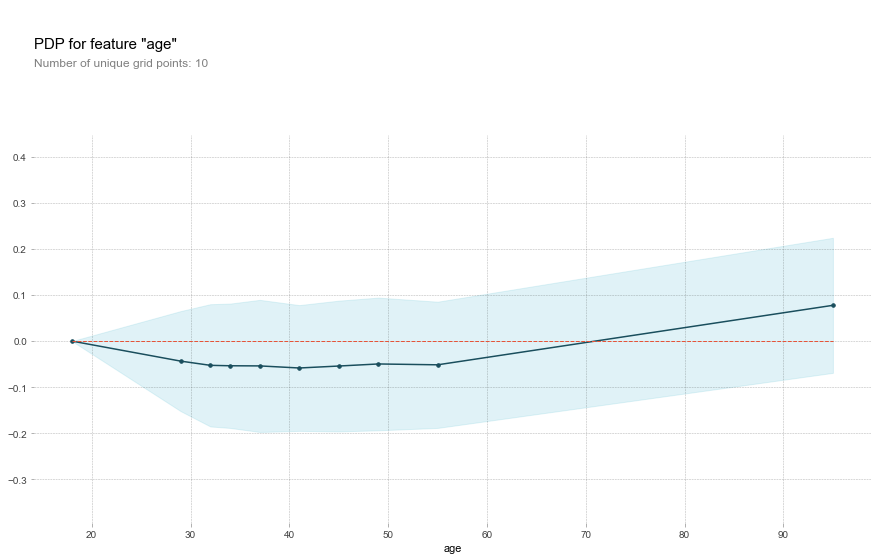

In [65]:
# Use Pdpbox
%matplotlib inline
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_encoded, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [66]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

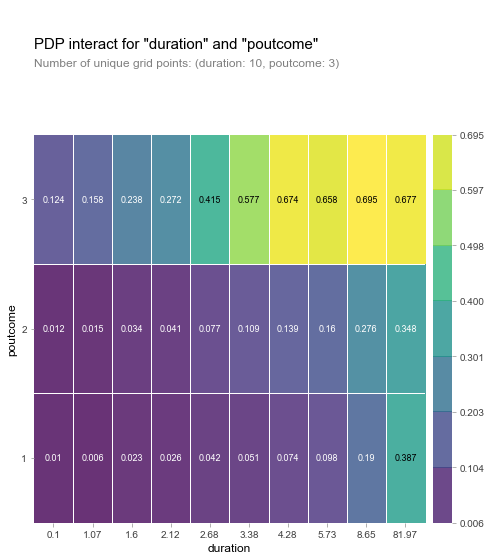

In [67]:
# partial dependence with 2 features

features = ['duration','poutcome']

interaction = pdp_interact(
    model=model, 
    dataset=X_encoded, 
    model_features=X_encoded.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);



In [68]:
!pip install shap

In [69]:
row = X_test.iloc[[2273]]
row

,age,job,marital,education,duration,campaign,poutcome
14154,25,self-employed,single,tertiary,2.23,1,unknown


In [70]:
X_train.columns

Index(['age', 'marital', 'duration', 'campaign', 'poutcome'], dtype='object')

In [106]:
# XGBoost classifier

import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

# processor = make_pipeline(
#     ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='median')
# )

# X_train_processed = processor.fit_transform(X_train)
# X_val_processed = processor.transform(X_val)
# X_test_processed = processor.transform(X_test)

# eval_set = [(X_train_processed, y_train), 
#             (X_val_processed, y_val)]

# model = XGBClassifier(n_estimators=1000, n_jobs=-1)
# model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
#           early_stopping_rounds=10)




from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['job', 'marital', 'education',
                                      'poutcome'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'job', 'data_type': dtype('O'),
                                          'mapping': technician        1
retired           2
management        3
housemaid         4
services          5
other             6
blue-collar       7
admin.            8
unemployed        9
entrepreneur     10
student          11
self-employed...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child

In [108]:
# precision & recall score for XGBoost classifier

y_pred6 = pipeline.predict(X_val)

print(precision_score(y_val, y_pred4,average='binary'))
print(recall_score(y_val, y_pred4,average='binary'))

0.5255905511811023
0.3662551440329218


In [109]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train_encoded.shape 

(26137, 7)

In [110]:

model = XGBClassifier(
    n_estimators=500, # <= [up to] 500 trees (but depends on early stopping)
    max_depth = 3, # Deeper Trees for high cardinality categories
    learning_rate = 0.5, 
    n_jobs=-1,
)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='error',
          early_stopping_rounds=50) # Stop if the score hasn't imporved in the last 50 rounds)

[0]	validation_0-error:0.099858	validation_1-error:0.098852
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.10005	validation_1-error:0.099311
[2]	validation_0-error:0.10005	validation_1-error:0.10023
[3]	validation_0-error:0.102537	validation_1-error:0.10176
[4]	validation_0-error:0.094808	validation_1-error:0.093037
[5]	validation_0-error:0.096492	validation_1-error:0.095027
[6]	validation_0-error:0.095841	validation_1-error:0.093956
[7]	validation_0-error:0.096185	validation_1-error:0.093803
[8]	validation_0-error:0.094617	validation_1-error:0.092578
[9]	validation_0-error:0.09454	validation_1-error:0.092884
[10]	validation_0-error:0.094426	validation_1-error:0.09365
[11]	validation_0-error:0.094579	validation_1-error:0.093803
[12]	validation_0-error:0.094387	validation_1-error:0.093344
[13]	validation_0-error:0.093201	validation_1-error:0.092884
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

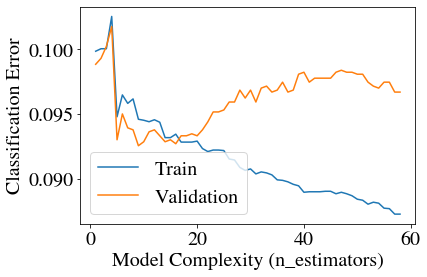

In [111]:
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label="Train")
plt.plot(epoch, val_error, label="Validation")
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.18, 0.22)) #Turn this on and off to see the full plt 
plt.legend();

In [90]:
X_train.shape,X_test.shape, X_val.shape

((26137, 7), (8169, 7), (6535, 7))

In [91]:
# uplift model
from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test)
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

Test ROC AUC for class 1:
0.8857134831211496


In [92]:
# to see how different features impacts predictions 

import shap

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit')  # For classification, this shows predicted probabilities

In [98]:
row = X_test.iloc[[1453]]
row

,age,job,marital,education,duration,campaign,poutcome
39930,32,student,single,tertiary,9.97,4,failure


In [99]:
explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit')  # For classification, this shows predicted probabilities

In [93]:
pip install pylift

Note: you may need to restart the kernel to use updated packages.


In [94]:
bank.head()

,age,job,marital,education,duration,campaign,poutcome,response_binary
0,58,management,married,tertiary,4.35,1,unknown,0
1,44,technician,single,secondary,2.52,1,unknown,0
2,33,entrepreneur,married,secondary,1.27,1,unknown,0
3,35,management,married,tertiary,2.32,1,unknown,0
4,28,management,single,tertiary,3.62,1,unknown,0


In [95]:
df=bank.drop(['job', 'marital', 'education', 'poutcome'],axis =1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] colsample_bytree=0.8940942285051636, gamma=5.096934491893438, max_depth=13, min_child_weight=34, n_estimators=160, subsample=0.5376217728345956 
[09:57:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.8940942285051636, gamma=5.096934491893438, max_depth=13, min_child_weight=34, n_estimators=160, subsample=0.5376217728345956, score=nan, total=   3.7s
[CV] colsample_bytree=0.8940942285051636, gamma=5.096934491893438, max_depth=13, min_child_weight=34, n_estimators=160, subsample=0.5376217728345956 
[09:57:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s


[CV]  colsample_bytree=0.8940942285051636, gamma=5.096934491893438, max_depth=13, min_child_weight=34, n_estimators=160, subsample=0.5376217728345956, score=nan, total=   4.2s
[CV] colsample_bytree=0.8940942285051636, gamma=5.096934491893438, max_depth=13, min_child_weight=34, n_estimators=160, subsample=0.5376217728345956 
[09:57:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.9s remaining:    0.0s


[CV]  colsample_bytree=0.8940942285051636, gamma=5.096934491893438, max_depth=13, min_child_weight=34, n_estimators=160, subsample=0.5376217728345956, score=nan, total=   2.6s
[CV] colsample_bytree=0.816908854481708, gamma=7.090745968019591, max_depth=9, min_child_weight=229, n_estimators=423, subsample=0.9359682226846602 
[09:57:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.816908854481708, gamma=7.090745968019591, max_depth=9, min_child_weight=229, n_estimators=423, subsample=0.9359682226846602, score=nan, total=   4.9s
[CV] colsample_bytree=0.816908854481708, gamma=7.090745968019591, max_depth=9, min_child_weight=229, n_estimators=423, subsample=0.9359682226846602 
[09:57:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  colsample_bytree=0.816908854481708, gamma=7.090745968019591, max_depth=9, min_child_weight=229, n_estimators=423,

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   53.0s finished


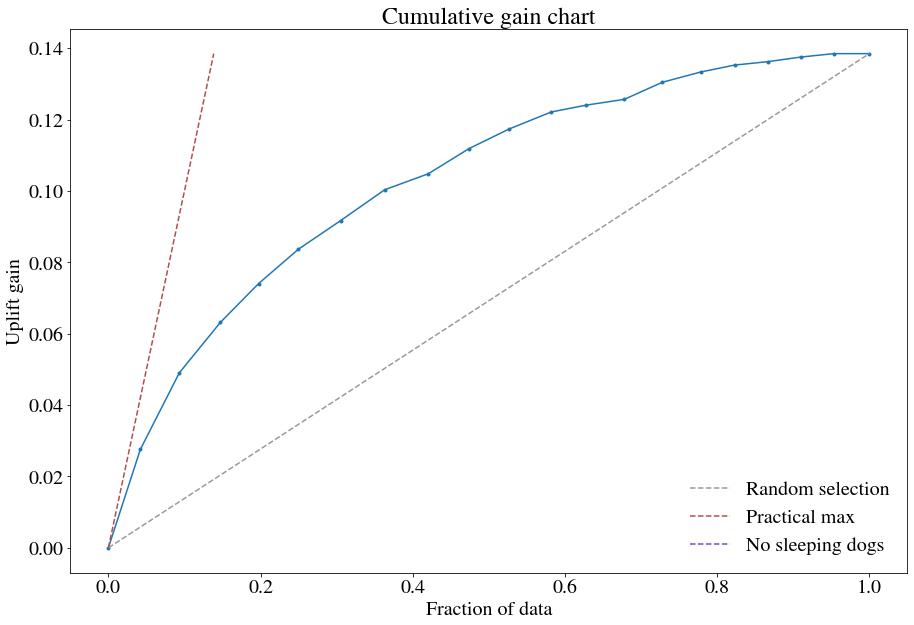

In [96]:

from pylift import TransformedOutcome
up = TransformedOutcome(df, col_treatment='campaign', col_outcome='response_binary')
up.randomized_search(n_iter=4)
up.fit(**up.rand_search_.best_params_)
up.plot(plot_type='cgains', show_practical_max=True, show_no_dogs=True)